# Dividir el data set en conjunto de entrenamiento y testing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [10]:
a = np.random.randn(len(data))

(array([ 1.,  2.,  9., 23., 43., 56., 34., 23.,  7.,  2.]),
 array([-3.10320683, -2.51247444, -1.92174205, -1.33100966, -0.74027727,
        -0.14954488,  0.44118751,  1.0319199 ,  1.62265229,  2.21338468,
         2.80411707]),
 <a list of 10 Patch objects>)

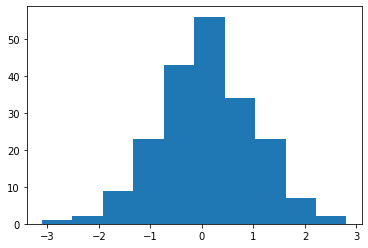

In [11]:
plt.hist(a)

In [13]:
check = (a < .8)
training = data[check]
testing = data[~check]

In [14]:
len(training), len(testing)

(154, 46)

In [16]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio",data=training).fit()

In [17]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     640.2
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.80e-74
Time:                        22:21:12   Log-Likelihood:                -300.33
No. Observations:                 154   AIC:                             606.7
Df Residuals:                     151   BIC:                             615.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7867      0.342      8.152      0.000       2.111       3.462
TV             0.0468      0.002     28.828      0.000       0.044       0.050
Radio          0.1862      0.009     20.360      0.000       0.168       0.204
==============================================================================
Omnibus:                       49.436   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.085
Skew:                          -1.348   Prob(JB):                     1.38e-26
Kurtosis:                       6.360   Cond. No.                         416.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.7867 + 0.0468 * TV + 0.1862 * Radio

### Validacion del modelo con el conjunto de testing

In [18]:
sales_pred = lm.predict(testing)
sales_pred

16     12.772895
20     18.160959
22      6.364599
23     16.613258
24      8.047099
25     15.736947
27     17.128030
30     21.757814
31     11.307890
35     17.149156
36     23.427431
40     16.411736
41     17.285518
46      8.826176
49      8.094720
51      9.270871
54     20.438138
58     21.882937
62     16.867180
67     12.002949
68     19.012549
71     10.585689
72     10.184622
74     17.349875
77     13.730104
78      8.606338
79      9.646889
84     20.780406
89     16.822975
90      9.981645
91      4.403915
95     16.309488
107     7.071521
119     6.673256
131    15.732829
133    19.306340
140     9.385587
141    18.439127
161    13.461315
168    17.257248
175    24.844792
176    20.029841
184    18.625385
190    12.286853
196     8.105750
197    12.798396
dtype: float64

In [19]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

113.04672505018316

In [20]:
RSE = np.sqrt(SSD / (len(testing)-2-1))
RSE

1.6214171597149862

In [21]:
sales_mean = np.mean(testing["Sales"])
error = RSE /sales_mean
error

0.11197296103721567